In [59]:
import configparser
import json
from telethon.sync import TelegramClient
from telethon import connection
# для корректного переноса времени сообщений в json
from datetime import date, datetime
# классы для работы с каналами
from telethon.tl.functions.channels import GetParticipantsRequest
from telethon.tl.types import ChannelParticipantsSearch
# класс для работы с сообщениями
from telethon.tl.functions.messages import GetHistoryRequest 
import pandas as pd
import datetime
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

здесь скачиваются все сообщения с канала, запускать потворно не надо

In [54]:
# # Считываем учетные данные
# config = configparser.ConfigParser()
# config.read("C://Users//olya//Documents//config.ini")

# # Присваиваем значения внутренним переменным
# api_id   = config['Telegram']['api_id']
# api_hash = config['Telegram']['api_hash']
# username = config['Telegram']['username']

In [55]:
# client = TelegramClient(username, api_id, api_hash)

In [56]:
# url = input("Введите ссылку на канал или чат: ")
# channel = await client.get_entity(url)

In [57]:
# async def dump_all_messages(channel):
# 	"""Записывает json-файл с информацией о всех сообщениях канала/чата"""
# 	offset_msg = 0    # номер записи, с которой начинается считывание
# 	limit_msg = 10000000   # максимальное число записей, передаваемых за один раз

# 	all_messages = []   # список всех сообщений
# 	total_messages = 0
# 	total_count_limit = 0  # поменяйте это значение, если вам нужны не все сообщения

# 	class DateTimeEncoder(json.JSONEncoder):
# 		'''Класс для сериализации записи дат в JSON'''
# 		def default(self, o):
# 			if isinstance(o, datetime):
# 				return o.isoformat()
# 			if isinstance(o, bytes):
# 				return list(o)
# 			return json.JSONEncoder.default(self, o)

# 	while True:
# 		history = await client(GetHistoryRequest(
# 			peer=channel,
# 			offset_id=offset_msg,
# 			offset_date=None, add_offset=0,
# 			limit=limit_msg, max_id=0, min_id=0,
# 			hash=0))
# 		if not history.messages:
# 			break
# 		messages = history.messages
# 		for message in messages:
# 			all_messages.append(message.to_dict())
# 		offset_msg = messages[len(messages) - 1].id
# 		total_messages = len(all_messages)
# 		if total_count_limit != 0 and total_messages >= total_count_limit:
# 			break

# 	with open('channel_messages.json', 'w', encoding='utf8') as outfile:
# 		 json.dump(all_messages, outfile, ensure_ascii=False, cls=DateTimeEncoder)


In [58]:
# await dump_all_messages(channel)

смотрим, как выглядит датафрейм

In [53]:
df=pd.read_json("channel_messages.json")
df

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,views,forwards,replies,edit_date,post_author,grouped_id,reactions,restriction_reason,ttl_period,action
0,Message,6852,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2022-12-29 13:11:23+00:00,"поняла, спасибо",False,False,False,False,False,...,NaN,NaN,None,None,None,NaN,None,[],NaN,NaN
1,Message,6851,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2022-12-29 13:04:55+00:00,"Это я условно имел ввиду, что массив должен со...",False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 1, 'replies...",None,None,NaN,None,[],NaN,NaN
2,Message,6850,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2022-12-29 13:03:21+00:00,"выходит ошибка ""Obj"" is not defined",False,False,False,False,False,...,NaN,NaN,None,None,None,NaN,None,[],NaN,NaN
3,Message,6849,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2022-12-29 12:59:44+00:00,"Получается media: [Obj(file_id=***),Obj(file_i...",False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 1, 'replies...",None,None,NaN,None,[],NaN,NaN
4,Message,6848,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2022-12-29 12:58:48+00:00,"Как я помню массив должен содержать объекты, к...",False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 0, 'replies...",None,None,NaN,None,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,MessageService,27,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2020-10-28 11:40:23+00:00,NaN,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'_': 'MessageActionChatAddUser', 'users': [21..."
6559,MessageService,4,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2020-10-19 13:11:37+00:00,NaN,False,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'_': 'MessageActionPinMessage'}
6560,Message,3,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2020-10-19 13:11:10+00:00,Всем привет! \nСоздала сообщество пользователе...,False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 0, 'replies...",2020-10-19T13:11:31+00:00,None,NaN,None,[],NaN,NaN
6561,MessageService,2,"{'_': 'PeerChannel', 'channel_id': 1327552181}",2020-10-19 13:06:24+00:00,NaN,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'_': 'MessageActionChatEditPhoto', 'photo': {..."


нам нужен только номер сообщения, его дата и содержание

In [29]:
df=df[["id","date","message","action"]]
df

,id,date,message,action
0,6852,2022-12-29 13:11:23+00:00,"поняла, спасибо",NaN
1,6851,2022-12-29 13:04:55+00:00,"Это я условно имел ввиду, что массив должен со...",NaN
2,6850,2022-12-29 13:03:21+00:00,"выходит ошибка ""Obj"" is not defined",NaN
3,6849,2022-12-29 12:59:44+00:00,"Получается media: [Obj(file_id=***),Obj(file_i...",NaN
4,6848,2022-12-29 12:58:48+00:00,"Как я помню массив должен содержать объекты, к...",NaN
...,...,...,...,...
6558,27,2020-10-28 11:40:23+00:00,NaN,"{'_': 'MessageActionChatAddUser', 'users': [21..."
6559,4,2020-10-19 13:11:37+00:00,NaN,{'_': 'MessageActionPinMessage'}
6560,3,2020-10-19 13:11:10+00:00,Всем привет! \nСоздала сообщество пользователе...,NaN
6561,2,2020-10-19 13:06:24+00:00,NaN,"{'_': 'MessageActionChatEditPhoto', 'photo': {..."


In [30]:
df.dtypes

id                       int64
date       datetime64[ns, UTC]
message                 object
action                  object
dtype: object

In [31]:
df['exdate'] = df['date'].apply(lambda x: x.date())
df['hour'] = df['date'].apply(lambda x: x.time().hour)
df['message'] = df['message'].apply(lambda x: str(x))
df=df[["id","exdate","hour","message","action"]]
df

,id,exdate,hour,message,action
0,6852,2022-12-29,13,"поняла, спасибо",NaN
1,6851,2022-12-29,13,"Это я условно имел ввиду, что массив должен со...",NaN
2,6850,2022-12-29,13,"выходит ошибка ""Obj"" is not defined",NaN
3,6849,2022-12-29,12,"Получается media: [Obj(file_id=***),Obj(file_i...",NaN
4,6848,2022-12-29,12,"Как я помню массив должен содержать объекты, к...",NaN
...,...,...,...,...,...
6558,27,2020-10-28,11,nan,"{'_': 'MessageActionChatAddUser', 'users': [21..."
6559,4,2020-10-19,13,nan,{'_': 'MessageActionPinMessage'}
6560,3,2020-10-19,13,Всем привет! \nСоздала сообщество пользователе...,NaN
6561,2,2020-10-19,13,nan,"{'_': 'MessageActionChatEditPhoto', 'photo': {..."


скопируем все сообщения с содержанием в новый датафрейм

In [32]:
df1=df.loc[df['message'] !='nan']
df1

,id,exdate,hour,message,action
0,6852,2022-12-29,13,"поняла, спасибо",NaN
1,6851,2022-12-29,13,"Это я условно имел ввиду, что массив должен со...",NaN
2,6850,2022-12-29,13,"выходит ошибка ""Obj"" is not defined",NaN
3,6849,2022-12-29,12,"Получается media: [Obj(file_id=***),Obj(file_i...",NaN
4,6848,2022-12-29,12,"Как я помню массив должен содержать объекты, к...",NaN
...,...,...,...,...,...
6553,32,2020-10-30,16,Спасибо за ваше замечание!,NaN
6554,31,2020-10-30,16,"Сейчас не совсем интуитивно, возьмём в работу",NaN
6555,30,2020-10-30,16,Вам требуется настроить подключение по инструк...,NaN
6556,29,2020-10-30,16,"посоны, куда жать?",NaN


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

посмотрим на то, как развивался канал относительно времени. для этого посчитаем количество сообщений в день

In [34]:
m1=df1.groupby(['exdate']).count()
m1=pd.DataFrame(m1['message'])
m1.index = pd.to_datetime(m1.index)
m1

,message
exdate,
2020-10-19,1
2020-10-30,6
2020-11-10,2
2020-11-11,6
2020-11-12,1
...,...
2022-12-23,4
2022-12-26,15
2022-12-27,3


<AxesSubplot:xlabel='exdate'>

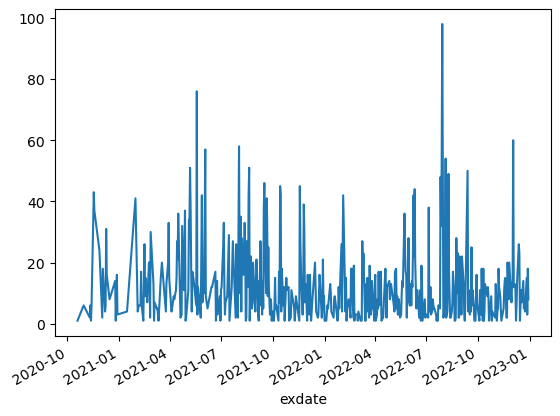

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
m1['message'].plot()

из такого графика мало что можно понять, сгруппируем количество сообщений по месяцам

<BarContainer object of 27 artists>

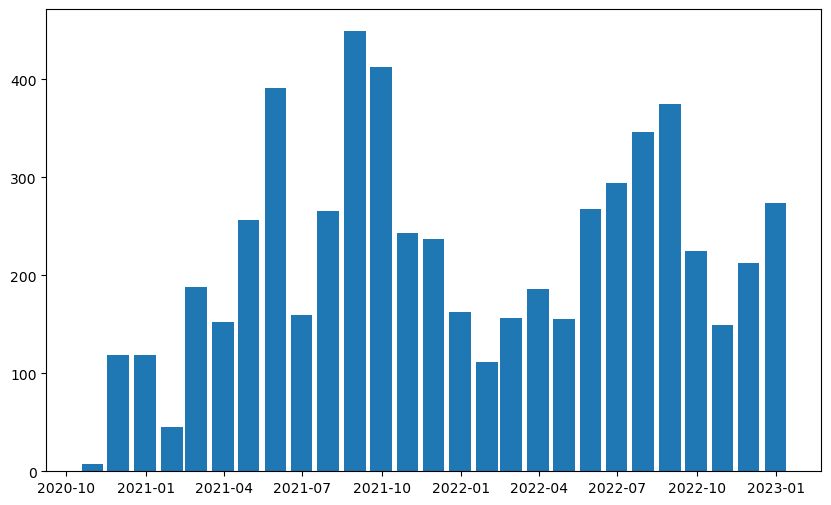

In [36]:
m1_month = m1.resample("M").sum()
  
# using subplot
fig, ax = plt.subplots(figsize=(10, 6))
  
# plotting bar graph
ax.bar(m1_month['2020':].index, 
       m1_month.loc['2020':, "message"], 
       width=25, align='center')

видно, что по сравнению с 2021 первым годом, активность несколько упала - стало меньше сообщений в месяц. также можно отметить отсутствие сезонности (что в принципе логично)

посмотрим на то, как распределена активность в канале в течении суток

Text(0, 0.5, 'messages')

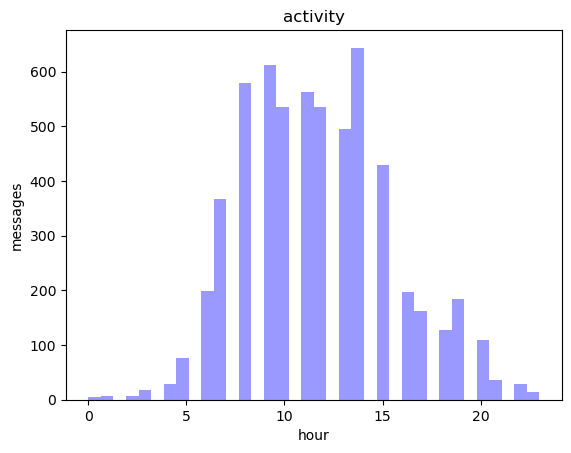

In [38]:
sns.distplot(df1['hour'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue')
# labels
plt.title('activity')
plt.xlabel('hour')
plt.ylabel('messages')

опять же, довольно логично, что большинство пишет сообщения в течении дня - примерно с 9 до 15

теперь посмотрим на то, какие слова наиболее часто встречаются в сообщениях канала. для этого удалим из сообщений предлоги, знаки препинания и поставим остальные слова в изначальную форму

In [41]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# функция для удаления знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

# заменяем все знаки препинания и стоп-слова на пробелы, заглавные буквы - на строчные
dfcopy=df1.copy()

dfcopy['message'] = dfcopy['message'].map(lambda x: x.lower())
dfcopy['message'] = dfcopy['message'].map(lambda x: remove_punct(x))
dfcopy['message'] = dfcopy['message'].map(lambda x: x.split(' '))
dfcopy['message'] = dfcopy['message'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
dfcopy['message'] = dfcopy['message'].map(lambda x: ' '.join(x))
dfcopy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,id,exdate,hour,message,action
0,6852,2022-12-29,13,поняла спасибо,NaN
1,6851,2022-12-29,13,это условно имел ввиду массив должен содержать...,NaN
2,6850,2022-12-29,13,выходит ошибка obj is not defined,NaN
3,6849,2022-12-29,12,получается media obj file id obj file id …,NaN
4,6848,2022-12-29,12,помню массив должен содержать объекты которые ...,NaN
...,...,...,...,...,...
6553,32,2020-10-30,16,спасибо ваше замечание,NaN
6554,31,2020-10-30,16,интуитивно возьмём работу,NaN
6555,30,2020-10-30,16,требуется настроить подключение инструкции htt...,NaN
6556,29,2020-10-30,16,посоны жать,NaN


In [51]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#функция для получения строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# функция для получения списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# функция для получения облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

In [61]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
# заменяем каждое слово на его начальную форму
df2=dfcopy.copy()

df2['message'] = df2['message'].map(lambda x: x.split(' '))
df2['message'] = df2['message'].map(lambda x: [morph.parse(token)[0].normal_form for token in x if token != " "])
df2['message'] = df2['message'].map(lambda x: ' '.join(x))
df2

<AxesSubplot:>

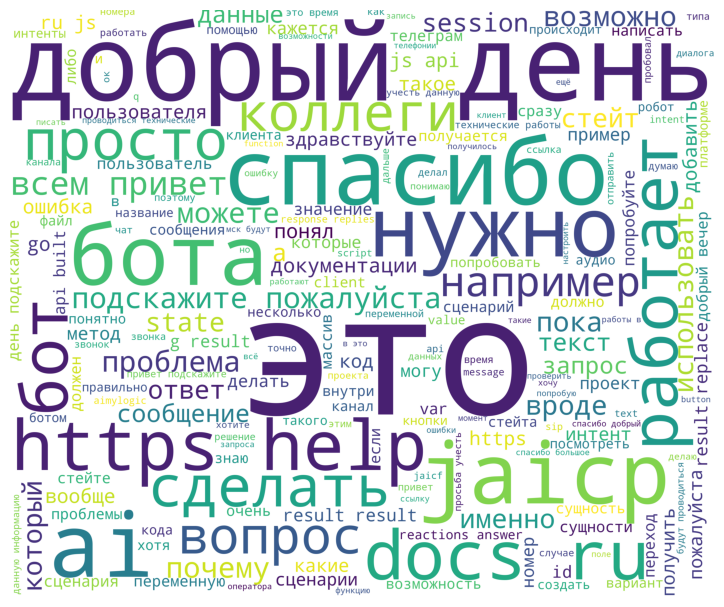

In [52]:
corpus = get_corpus(dfcopy['message'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

основная тема сообщений в канале - помощь с техническими вопросами(видимо, вопросы успешно решаются, судя по количеству слово спасибо)